## Example of gradient decent

In [0]:
import math

# f(x) = log(x) * log(x)

def fn(x):
  # return math.pow((math.log(x)), 2)
  return x*x + 4*x + 9

def derivative_fn(x):
  # return 2.0 * math.log(x) / x
  return 2*x + 4

x = 2 # initial value
learning_rate = 3 

print ("Starting at", "x:", x, "log(x)^2:", fn(x))

for step in range(20):
  x = x - learning_rate * derivative_fn(x) 
  print("step", step + 1, "x:", x, "log(x)^2:", fn(x))

Starting at x: 2 log(x)^2: 21
step 1 x: -22 log(x)^2: 405
step 2 x: 98 log(x)^2: 10005
step 3 x: -502 log(x)^2: 250005
step 4 x: 2498 log(x)^2: 6250005
step 5 x: -12502 log(x)^2: 156250005
step 6 x: 62498 log(x)^2: 3906250005
step 7 x: -312502 log(x)^2: 97656250005
step 8 x: 1562498 log(x)^2: 2441406250005
step 9 x: -7812502 log(x)^2: 61035156250005
step 10 x: 39062498 log(x)^2: 1525878906250005
step 11 x: -195312502 log(x)^2: 38146972656250005
step 12 x: 976562498 log(x)^2: 953674316406250005
step 13 x: -4882812502 log(x)^2: 23841857910156250005
step 14 x: 24414062498 log(x)^2: 596046447753906250005
step 15 x: -122070312502 log(x)^2: 14901161193847656250005
step 16 x: 610351562498 log(x)^2: 372529029846191406250005
step 17 x: -3051757812502 log(x)^2: 9313225746154785156250005
step 18 x: 15258789062498 log(x)^2: 232830643653869628906250005
step 19 x: -76293945312502 log(x)^2: 5820766091346740722656250005
step 20 x: 381469726562498 log(x)^2: 145519152283668518066406250005


## Using TensorFlow

In [0]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf

def fn_t(x):
  return tf.square(tf.log(x))
  # return tf.square(x) + 4 * x + 9

x = tf.Variable(2, name='x', dtype=tf.float32)
y = fn_t(x)

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(y)

init = tf.initialize_all_variables()

def optimize():
  with tf.Session() as session:
    session.run(init)
    print("starting at", "x:", session.run(x), "log(x)^2:", session.run(y))
    for step in range(10):  
      session.run(train)
      print("step", step + 1, "x:", session.run(x), "log(x)^2:", session.run(y))
        

optimize()

starting at x: 2.0 log(x)^2: 0.480453
step 1 x: 1.6534264 log(x)^2: 0.25285786
step 2 x: 1.3493005 log(x)^2: 0.08975197
step 3 x: 1.1272696 log(x)^2: 0.014351669
step 4 x: 1.0209966 log(x)^2: 0.0004317744
step 5 x: 1.0006447 log(x)^2: 4.1534943e-07
step 6 x: 1.0000006 log(x)^2: 3.5527118e-13
step 7 x: 1.0 log(x)^2: 0.0
step 8 x: 1.0 log(x)^2: 0.0
step 9 x: 1.0 log(x)^2: 0.0
step 10 x: 1.0 log(x)^2: 0.0


## Gradient decent to solve Linear Regression

In [0]:
import numpy as np

# Dimension of input data
n_data, n_feature = 1000, 20

# Randomly initialized data, stacked with bias
X = np.hstack((np.random.rand(n_data, n_feature), 
               np.ones((n_data, 1), dtype=float)))

# Choose the weights to be [1, 2, 3, ... , 21]
w = np.array(range(1, n_feature + 2), dtype=float)
y = np.dot(X, w) # + np.random.normal(0, 100)

Given $\mathbf{X}$ and $\mathbf{y}$, objective: compute $\mathbf{w}$

In [0]:
def loss(w, X, y):
  # squared loss
  return np.sum(np.square(np.dot(X, w) - y)) / (X.shape[0] * 2)

def gradient(w, X, y, j):
  return np.dot(np.dot(X, w) - y, X[:,j]) / X.shape[0]

def gradient_decent(w, X, y, learning_rate, steps):
  losses = []
  for i in range(steps):
    # for each step
    for j in range(w.shape[0]):
      # update each weight 
      w[j] = w[j] - learning_rate * gradient(w, X, y, j)
    current_loss = loss(w, X, y)
    if i % 100 == 0:
      print ("step: {}, Loss: {}".format(i + 1, current_loss))
    losses.append(np.log(current_loss))
  print ("step: {}, Loss: {}".format(steps + 1, loss(w, X, y)))
  return w, losses

In [0]:
# Initialize some random weights
w_init = np.random.normal(0, 1, w.shape[0])
w_init

array([-0.87261593, -1.14434284, -0.58552646,  0.03368542, -0.59867309,
        0.57590738,  0.70025536, -0.93294626,  0.73296795, -0.03065355,
        0.63849428,  0.35340506,  0.21934023, -0.03204239, -1.49254429,
        0.95222999,  0.24807538, -0.8005044 ,  0.67213384,  0.45047479,
        0.69688205])

In [0]:
w_current_init = np.copy(w_init)
w_learned, _ = gradient_decent(w_current_init, X, y, 1, 1000)

step: 1, Loss: 415.52232988940244
step: 101, Loss: 2.3369404930841067
step: 201, Loss: 0.001434313006072661
step: 301, Loss: 5.926572533121268e-07
step: 401, Loss: 2.860519792987536e-10
step: 501, Loss: 1.3328926134598832e-13
step: 601, Loss: 6.245208139643408e-17
step: 701, Loss: 2.924851874057775e-20
step: 801, Loss: 1.3691339715277408e-23
step: 901, Loss: 6.489207671671494e-27
step: 1001, Loss: 1.7145418458435559e-28


In [0]:
w_learned

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

In [0]:
# Study the learning curve of small, medium, large weights
learning_curves = {}
learning_rates = [5, 1, 0.1]
for learning_rate in learning_rates:
  w_current_init = np.copy(w_init)
  print ('\n\nlearning rate: {}'.format(learning_rate))
  w_learned, losses = gradient_decent(w_current_init, X, y, learning_rate, 1000)
  learning_curves[str(learning_rate)] = losses



learning rate: 5
step: 1, Loss: 3997.889220185752
step: 101, Loss: 46227.349872747
step: 201, Loss: 8581312.037537334
step: 301, Loss: 695273563.8745576
step: 401, Loss: 44783329312.70889
step: 501, Loss: 9716698080912.752
step: 601, Loss: 935163497186738.4
step: 701, Loss: 4.819377051682248e+16
step: 801, Loss: 9.5354280637612e+18
step: 901, Loss: 1.212802928075905e+21
step: 1001, Loss: 5.694567753544514e+22


learning rate: 1
step: 1, Loss: 415.52232988940244
step: 101, Loss: 2.3369404930841067
step: 201, Loss: 0.001434313006072661
step: 301, Loss: 5.926572533121268e-07
step: 401, Loss: 2.860519792987536e-10
step: 501, Loss: 1.3328926134598832e-13
step: 601, Loss: 6.245208139643408e-17
step: 701, Loss: 2.924851874057775e-20
step: 801, Loss: 1.3691339715277408e-23
step: 901, Loss: 6.489207671671494e-27
step: 1001, Loss: 1.7145418458435559e-28


learning rate: 0.1
step: 1, Loss: 2334.1288166184377
step: 101, Loss: 8.1133595986892
step: 201, Loss: 1.6810777867482913
step: 301, Loss: 0

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
df_losses = pd.DataFrame(learning_curves).reset_index()
df_losses.columns = ['index'] + ['lr=' + str(x) for x in learning_rates]

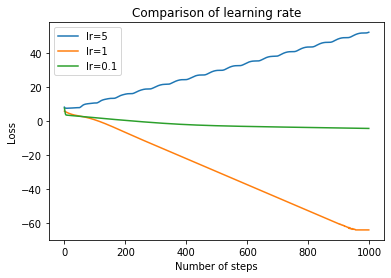

In [0]:
for lr in learning_rates:
  plt.plot('index', 'lr={}'.format(lr), data=df_losses)
plt.title('Comparison of learning rate')
plt.xlabel('Number of steps')
plt.ylabel('Loss')
plt.legend()

## Closed form solution (Analytical solution)
Let $\mathbf{X} \in R ^{n \times d}$ be the feature matrix, $\mathbf{w}$ be the $d$ dimensional weight vector and $\mathbf{y}$ be the $n$ dimensional label vector. We can compute the optimal weight vector $\mathbf{w}^*$ as follows.

Let the cost function $J(\mathbf{w})=||\mathbf{Xw}-\mathbf{y}||_2^2 = \mathbf{w}^T(\mathbf{X}^T\mathbf{X})\mathbf{w}-2\mathbf{y}^T\mathbf{Xw} + ||\mathbf{y}||_2^2$

Note: $\displaystyle \frac{\partial (\mathbf{AX})}{\partial \mathbf{X}}=\mathbf{A}^T$ and $\displaystyle \frac{\partial (\mathbf{X}^T\mathbf{AX})}{\partial \mathbf{X}} = \mathbf{AX}+\mathbf{A}^T\mathbf{X}$

Therefore, $\displaystyle \frac{\partial}{\partial \mathbf{w}}J(\mathbf{w}) = 2\mathbf{X}^T\mathbf{Xw} - 2\mathbf{X}^T\mathbf{y}$

Setting $\displaystyle \frac{\partial}{\partial \mathbf{w}}J(\mathbf{w} = 0)$, we have: $\mathbf{X}^T\mathbf{Xw^*} = \mathbf{X}^T\mathbf{y} \Rightarrow \mathbf{w}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$

In [0]:
# closed form solution
W_learned = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), y)

In [0]:
W_learned

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

In [0]:
# Solved using Tensorflow
X_tf = tf.placeholder(tf.float64, shape=(n_data, n_feature + 1))
y_tf = tf.placeholder(tf.float64, shape=(n_data, 1))
w_tf = tf.Variable(np.random.normal(0, 1, (w.shape[0], 1)), name="w_tf") 

learning_rate = 1
training_epochs = 5000

In [0]:
# Hypothesis 
y_pred =tf.matmul(X_tf, w_tf)
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred - y_tf, 2)) /  (2 * n_data) 
  
# Gradient Descent Optimizer 
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Global Variables Initializer 
init = tf.global_variables_initializer() 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
        # Feeding each data point into the optimizer using Feed Dictionary 
        sess.run(optimizer, feed_dict = {X_tf:X, y_tf:y.reshape((n_data, 1))}) 
        # Displaying the result after every 100 epochs 
        if (epoch + 1) % 100 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X_tf:X, y_tf:y.reshape((n_data, 1))}) 
            print("Epoch", (epoch + 1), ": cost =", c)
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X_tf:X, y_tf: y.reshape((n_data, 1))}) 
    weight = sess.run(w_tf) 

Epoch 100 : cost = 16.7754364143082
Epoch 200 : cost = 4.243699520218636
Epoch 300 : cost = 1.1267368872860177
Epoch 400 : cost = 0.5803097863509004
Epoch 500 : cost = 0.4276462384273216
Epoch 600 : cost = 0.32498216226978277
Epoch 700 : cost = 0.2405099438185122
Epoch 800 : cost = 0.17245701763418822
Epoch 900 : cost = 0.11974236889839193
Epoch 1000 : cost = 0.08046472708511224
Epoch 1100 : cost = 0.052292899898942466
Epoch 1200 : cost = 0.03283757642167765
Epoch 1300 : cost = 0.019903640073044234
Epoch 1400 : cost = 0.011630638120538628
Epoch 1500 : cost = 0.006543318962887967
Epoch 1600 : cost = 0.0035389013288223163
Epoch 1700 : cost = 0.0018369839971114975
Epoch 1800 : cost = 0.0009135601905174816
Epoch 1900 : cost = 0.00043443834996286196
Epoch 2000 : cost = 0.00019714076048840307
Epoch 2100 : cost = 8.517477723986907e-05
Epoch 2200 : cost = 3.495332242929807e-05
Epoch 2300 : cost = 1.3589045415612267e-05
Epoch 2400 : cost = 4.991276662004273e-06
Epoch 2500 : cost = 1.72690959088

In [0]:
weight

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.]])